# Explore Preliminary GTEx_TCGA cibersort deconvolution results
```
Andrew E. Davidson
aedavids@ucsc.edu
11/4/22
```

**<span style="color:red">TODO</span>**
- ~~when we dropped colmuns the expextedIndex col change, we are coloring the wrong columnm~~
- ~~refactor the code that drops cols, and adds headers~~
- 'GTEx Kidney_Cortex fractions' some of the noise in first sample is from TCGA is from kidney cancer DLBC, KICH, KIRP, OV , READ. create a dictionary mapping TCGA to tissue
- ~~add correlation and p-value to table~~
- ~~sort by correlation~~
- add meta data so we can match tissue to cancer type
    * see AEDWIP /private/groups/kimlab/GTEx_TCGA/{tcgaType.csv,tissue2Cancer.csv}

explore initial results.

**cibersort run overview**
run script: extraCellularRNA/terra/cibersortx/bin/run_cibersortx_fractions.sh

ref:
- terra/jupyterNotebooks/cibersort/createCibersortMixtureMatrix.ipynb 
    * describes how fractions matrix was create from training set data

output:
```
cd /scratch/aedavids/cibersort.out

ciberSort.debug.out.2022-10-18-07.37.32-PDT 
GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT/
```

input: /private/groups/kimlab/GTEx_TCGA/geneSignatureProfiles/best/GTEx_TCGA_1vsAll-design:~__gender+category-padj:0.001-lfc:2.0-n:25/ciberSort

In [1]:
import bme263DataVis.utilities as utl
from IPython.display import display
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import matplotlib.patches as mplpatches

import numpy as np
import pandas as pd
import pathlib as pl

In [2]:
imgOutDir = pl.Path("img/explorePreliminaryGTEx_TCGA-cibersortDeconvolutionResults")
imgOutDir.mkdir(parents=True, exist_ok=True)

# useful function for converting plot titles to strings
# https://stackoverflow.com/a/1007615/4586180
import re
def urlify(s):

    # Remove all non-word characters (everything except numbers and letters)
    s = re.sub(r"[^\w\s]", '', s)

    # Replace all runs of whitespace with a single dash
    s = re.sub(r"\s+", '-', s)

    return s

# Prints: I-cant-get-no-satisfaction"
#print(urlify("I can't get no satisfaction!"))

In [3]:
# load cibersort results
cibersortOut = pl.Path("/scratch/aedavids/cibersort.out/GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT")
cibersortRet = cibersortOut.joinpath("CIBERSORTx_GTEx_TCGA_TrainGroupby_mixture-2022-10-18-07.40.54-PDT_Results.txt")
cibersortFractionsDF = pd.read_csv(cibersortRet, sep='\t')

In [4]:
# load train set meta data
# columns: sample_id, participant_id, category, gender, age, dataSet + fractions

klDir = pl.Path("/private/groups/kimlab")
bestDir = klDir.joinpath("GTEx_TCGA/geneSignatureProfiles/best/")
dataDir = bestDir.joinpath('GTEx_TCGA_1vsAll-design:~__gender_+_category-padj:0.001-lfc:2.0-n:25')
metaDataFile = dataDir.joinpath("ciberSort/GTEx_TCGA_TrainGroupby_expectedFractions.txt")
metaDataDF = pd.read_csv(metaDataFile, sep='\t')

In [5]:
print(cibersortFractionsDF.shape)
print(cibersortFractionsDF.columns)
cibersortFractionsDF.iloc[0:5,0:5]

(15801, 87)
Index(['Mixture', 'ACC', 'Adipose_Subcutaneous', 'Adipose_Visceral_Omentum',
       'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial',
       'BLCA', 'BRCA', 'Bladder', 'Brain_Amygdala',
       'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia',
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
       'Brain_Spinal_cord_cervical_c-1', 'Brain_Substantia_nigra',
       'Breast_Mammary_Tissue', 'CESC', 'CHOL', 'COAD',
       'Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes',
       'Cervix_Endocervix', 'Colon_Sigmoid', 'Colon_Transverse', 'DLBC',
       'ESCA', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa',
       'Esophagus_Muscularis', 'GBM', 'HNSC', 'Heart_Atrial_Appendage',
       'Heart_Left_Ventricle', 'KICH', 'KIRC', 'KIRP', 'Ki

,Mixture,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland
0,GTEX-1117F-0226-SM-5GZZ7,0.000002,0.320885,0.156637,0.000154
1,GTEX-1117F-0526-SM-5EGHJ,0.000022,0.295300,0.150368,0.000842
2,GTEX-1117F-0726-SM-5GIEN,0.000153,0.054458,0.010553,0.000014
3,GTEX-1117F-2826-SM-5GZXL,0.000000,0.290041,0.142267,0.000078
4,GTEX-1117F-3226-SM-5N9CT,0.000217,0.004459,0.000000,0.000000


In [6]:
print(metaDataDF.shape)
print(metaDataDF.columns)
display(metaDataDF.iloc[0:5,0:7])
display(metaDataDF.iloc[15796:,0:7])

(15801, 89)
Index(['sample_id', 'participant_id', 'category', 'gender', 'age', 'dataSet',
       'ACC', 'Adipose_Subcutaneous', 'Adipose_Visceral_Omentum',
       'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial',
       'BLCA', 'BRCA', 'Bladder', 'Brain_Amygdala',
       'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia',
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
       'Brain_Spinal_cord_cervical_c-1', 'Brain_Substantia_nigra',
       'Breast_Mammary_Tissue', 'CESC', 'CHOL', 'COAD',
       'Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes',
       'Cervix_Endocervix', 'Colon_Sigmoid', 'Colon_Transverse', 'DLBC',
       'ESCA', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa',
       'Esophagus_Muscularis', 'GBM', 'HNSC', 'Heart_Atrial_App

,sample_id,participant_id,category,gender,age,dataSet,ACC
0,GTEX-1117F-0226-SM-5GZZ7,GTEX-1117F,Adipose_Subcutaneous,Female,66.0,GTEx,0.0
1,GTEX-1117F-0526-SM-5EGHJ,GTEX-1117F,Artery_Tibial,Female,66.0,GTEx,0.0
2,GTEX-1117F-0726-SM-5GIEN,GTEX-1117F,Heart_Atrial_Appendage,Female,66.0,GTEx,0.0
3,GTEX-1117F-2826-SM-5GZXL,GTEX-1117F,Breast_Mammary_Tissue,Female,66.0,GTEx,0.0
4,GTEX-1117F-3226-SM-5N9CT,GTEX-1117F,Brain_Cortex,Female,66.0,GTEx,0.0


,sample_id,participant_id,category,gender,age,dataSet,ACC
15796,UVM-WC-AA9E-TP,UVM-WC-AA9E,UVM,male,60.0,TCGA,0.0
15797,UVM-YZ-A980-TP,UVM-YZ-A980,UVM,male,75.0,TCGA,0.0
15798,UVM-YZ-A983-TP,UVM-YZ-A983,UVM,female,51.0,TCGA,0.0
15799,UVM-YZ-A984-TP,UVM-YZ-A984,UVM,female,50.0,TCGA,0.0
15800,UVM-YZ-A985-TP,UVM-YZ-A985,UVM,female,41.0,TCGA,0.0


In [7]:
statCols = ['Mixture', 'P-value', 'Correlation', 'RMSE']
typeCols = ['ACC', 'Adipose_Subcutaneous', 'Adipose_Visceral_Omentum',
       'Adrenal_Gland', 'Artery_Aorta', 'Artery_Coronary', 'Artery_Tibial',
       'BLCA', 'BRCA', 'Bladder', 'Brain_Amygdala',
       'Brain_Anterior_cingulate_cortex_BA24', 'Brain_Caudate_basal_ganglia',
       'Brain_Cerebellar_Hemisphere', 'Brain_Cerebellum', 'Brain_Cortex',
       'Brain_Frontal_Cortex_BA9', 'Brain_Hippocampus', 'Brain_Hypothalamus',
       'Brain_Nucleus_accumbens_basal_ganglia', 'Brain_Putamen_basal_ganglia',
       'Brain_Spinal_cord_cervical_c-1', 'Brain_Substantia_nigra',
       'Breast_Mammary_Tissue', 'CESC', 'CHOL', 'COAD',
       'Cells_Cultured_fibroblasts', 'Cells_EBV-transformed_lymphocytes',
       'Cervix_Endocervix', 'Colon_Sigmoid', 'Colon_Transverse', 'DLBC',
       'ESCA', 'Esophagus_Gastroesophageal_Junction', 'Esophagus_Mucosa',
       'Esophagus_Muscularis', 'GBM', 'HNSC', 'Heart_Atrial_Appendage',
       'Heart_Left_Ventricle', 'KICH', 'KIRC', 'KIRP', 'Kidney_Cortex', 'LGG',
       'LIHC', 'LUAD', 'LUSC', 'Liver', 'Lung', 'MESO', 'Minor_Salivary_Gland',
       'Muscle_Skeletal', 'Nerve_Tibial', 'OV', 'Ovary', 'PAAD', 'PCPG',
       'PRAD', 'Pancreas', 'Pituitary', 'Prostate', 'READ', 'SARC', 'SKCM',
       'STAD', 'Skin_Not_Sun_Exposed_Suprapubic', 'Skin_Sun_Exposed_Lower_leg',
       'Small_Intestine_Terminal_Ileum', 'Spleen', 'Stomach', 'TGCT', 'THCA',
       'THYM', 'Testis', 'Thyroid', 'UCEC', 'UCS', 'UVM', 'Uterus', 'Vagina',
       'Whole_Blood']

## Sanity check fractions should sum to 1

In [8]:
byRow=1
ret = cibersortFractionsDF.loc[:, typeCols].sum(axis=byRow)
assert np.isclose( sum(ret), cibersortFractionsDF.shape[0]), "ERROR fraction must sum to 1"

## describe cibersort stats

In [9]:
# select samples with large R
correlationThreshold = 0.9

selectRowsWithHighR = (cibersortFractionsDF.loc[:, 'Correlation'] >= correlationThreshold) 
cibersortFractionHighRDF = cibersortFractionsDF.loc[selectRowsWithHighR, statCols]

fmt = "number of mixtures with correlationThreshold >= {} : {} %{}"
numHighR = sum(selectRowsWithHighR)
print( fmt.format(correlationThreshold, numHighR, numHighR / cibersortFractionsDF.shape[0] * 100) ) 

cibersortFractionHighRDF.head()

number of mixtures with correlationThreshold >= 0.9 : 9873 %62.48338712739701


,Mixture,P-value,Correlation,RMSE
0,GTEX-1117F-0226-SM-5GZZ7,0.0,0.985425,0.926455
1,GTEX-1117F-0526-SM-5EGHJ,0.0,0.979791,0.934695
2,GTEX-1117F-0726-SM-5GIEN,0.0,0.984906,0.447916
3,GTEX-1117F-2826-SM-5GZXL,0.0,0.988464,0.907675
4,GTEX-1117F-3226-SM-5N9CT,0.0,0.917052,0.949553


In [10]:
pvalueThreshold = 0.01
selectRowsWithSignifigantPValue = (cibersortFractionsDF.loc[:, 'P-value'] <= pvalueThreshold) 
cibersortFractionSignifigantPValueRDF = cibersortFractionsDF.loc[selectRowsWithHighR, statCols]

fmt = "number of mixtures with p-value <= {} : {} %{}"
numSignifigantPValue = sum(selectRowsWithSignifigantPValue)
print( fmt.format(pvalueThreshold, numSignifigantPValue, numSignifigantPValue / cibersortFractionsDF.shape[0] * 100) ) 

cibersortFractionSignifigantPValueRDF.head()

number of mixtures with p-value <= 0.01 : 15154 %95.90532244794633


,Mixture,P-value,Correlation,RMSE
0,GTEX-1117F-0226-SM-5GZZ7,0.0,0.985425,0.926455
1,GTEX-1117F-0526-SM-5EGHJ,0.0,0.979791,0.934695
2,GTEX-1117F-0726-SM-5GIEN,0.0,0.984906,0.447916
3,GTEX-1117F-2826-SM-5GZXL,0.0,0.988464,0.907675
4,GTEX-1117F-3226-SM-5N9CT,0.0,0.917052,0.949553


In [11]:

selectRowsWithHighRandSmallP = (cibersortFractionsDF.loc[:, 'Correlation'] >= correlationThreshold) \
                            & (cibersortFractionsDF.loc[:, 'P-value'] <= pvalueThreshold)

fmt = "number of mixtures with correlationThreshold >= {} and pvalue <= {} : {}"
print( fmt.format(correlationThreshold, pvalueThreshold, sum(selectRowsWithHighR)) )
cibersortFractionLargeRDF = cibersortFractionsDF.loc[selectRowsWithHighR, statCols]
cibersortFractionLargeRDF.head()

number of mixtures with correlationThreshold >= 0.9 and pvalue <= 0.01 : 9873


,Mixture,P-value,Correlation,RMSE
0,GTEX-1117F-0226-SM-5GZZ7,0.0,0.985425,0.926455
1,GTEX-1117F-0526-SM-5EGHJ,0.0,0.979791,0.934695
2,GTEX-1117F-0726-SM-5GIEN,0.0,0.984906,0.447916
3,GTEX-1117F-2826-SM-5GZXL,0.0,0.988464,0.907675
4,GTEX-1117F-3226-SM-5N9CT,0.0,0.917052,0.949553


In [12]:
#aediwp
badFMT = "number of mixtures with correlationThreshold < {} or pvalue > {} : {}"
selectRowsWithLowRandLargeP = (cibersortFractionsDF.loc[:, 'Correlation'] < correlationThreshold) \
                            | (cibersortFractionsDF.loc[:, 'P-value'] > pvalueThreshold)
badCibersortFractionDF = cibersortFractionsDF.loc[selectRowsWithLowRandLargeP, statCols]
print(badFMT.format(correlationThreshold, pvalueThreshold, badCibersortFractionDF.shape[0]))
badCibersortFractionDF.head()

number of mixtures with correlationThreshold < 0.9 or pvalue > 0.01 : 5928


,Mixture,P-value,Correlation,RMSE
8,GTEX-111CU-0626-SM-5EGHL,0.00,0.829515,0.955378
9,GTEX-111CU-0826-SM-5EGIJ,0.00,0.808828,0.911086
17,GTEX-111FC-0326-SM-5GZZ1,0.00,0.854079,0.709862
21,GTEX-111FC-0826-SM-5GZWO,0.01,0.460059,0.976231
24,GTEX-111FC-2926-SM-5GZY7,0.00,0.896679,0.445089


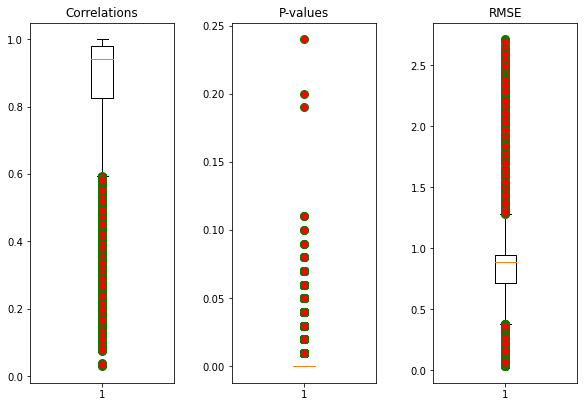

In [13]:
# box plots of stats
plotUtils =  utl.MatPlotLibUtilities()

panelWidthInInches = 2
panelHeightInInches = 5
pageWidthInInches  = panelWidthInInches * 3 + 1 
pageHeightInInches = panelHeightInInches  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )

# correlation
leftRelativeSize = 0
bottomRelativeSize = 0
correlationPanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

# fliers are outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')

plotDict = correlationPanel.boxplot( x=cibersortFractionsDF.loc[:,'Correlation'],
                        flierprops=flierprops)
correlationPanel.set_title("Correlations")

# pvalue
leftRelativeSize = 0.40 #0.5
bottomRelativeSize = 0.0
pValuePanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

# fliers are outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')

plotDict = pValuePanel.boxplot( x=cibersortFractionsDF.loc[:,'P-value'],
                        flierprops=flierprops)
pValuePanel.set_title("P-values")

# rmse
leftRelativeSize = 0.8
bottomRelativeSize = 0.0
rmsePanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

rmsePanel.set_title("RMSE")

# fliers are outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')

plotDict = rmsePanel.boxplot( x=cibersortFractionsDF.loc[:,'RMSE'],
                        flierprops=flierprops)

# fig.show()
title = 'Cibersort-Training-Dataset-wisker-plot-GTEx_TCGA_1vsAlldesign__gender__categorypadj0001lfc20n25'
#fig.suptitle(title)
imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile, bbox_inches='tight', dpi=300, facecolor="white", transparent=True )

In [14]:
# find outliers
q1, q3 = cibersortFractionsDF.loc[:,'Correlation'].quantile([0.25, 0.75])
iqr = q3 - q1
print("q1: {} q3: {} iqr:{} ".format(q1, q3, iqr))
bottomWisker = q1 - 1.5 * iqr
print("bottomWisker= q1 - 1.5 * iqr : {:.4f}".format(bottomWisker))
topWisker = q3 + 1.5 * iqr

selectOutliersLocical  = cibersortFractionsDF.loc[:,'Correlation'] < bottomWisker
correlationOutliersStatsDF = cibersortFractionsDF.loc[selectOutliersLocical, statCols]
print("correlationOutliersStatsDF.shape:{}".format(correlationOutliersStatsDF.shape))
print("percent of samples that are outliers: {:.3f}%"\
      .format(correlationOutliersStatsDF.shape[0] /cibersortFractionsDF.shape[0] * 100))
correlationOutliersStatsDF

aedwip print number of samples that are outliers

print number of pvalue outliers

SyntaxError: invalid syntax (2424055536.py, line 16)

In [ ]:
aedwip

# Compare Cibersort fractions to True labels

In [15]:
# make sure the ids are ordered the same way
ret = sum(metaDataDF.loc[:,["sample_id"]].values == cibersortFractionsDF.loc[:,["Mixture"]].values) 
assert ret == 15801, "Error rows in not in the same sort order" 

In [16]:
# Treat fractions like vectors, calculate the eculicdian distance
byRows = 1 # we have row vectors, default assume column vectors
eclidianDistanceNP = np.linalg.norm( cibersortFractionsDF.loc[:, typeCols] \
                                    - metaDataDF.loc[:, typeCols], axis=byRows )
print(eclidianDistanceNP.shape)
assert eclidianDistanceNP.shape[0] == 15801, "Error we should have a magnitude for each sample"
#print(eclidianDistanceNP[0:9])
edDF = pd.DataFrame(eclidianDistanceNP, columns=["distance"])
display(edDF.head())
edDF.describe()

(15801,)


,distance
0,0.730479
1,0.987206
2,0.136263
3,0.856040
4,0.857250


,distance
count,15801.000000
mean,0.672687
std,0.303808
min,0.018890
25%,0.447907
50%,0.736189
75%,0.932172
max,1.371468


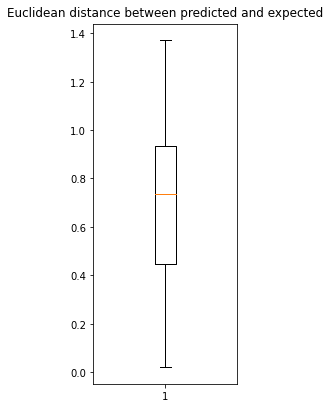

In [17]:
panelWidthInInches = 2
panelHeightInInches = 5 
pageWidthInInches  = panelWidthInInches #* 3 + 1 
pageHeightInInches = panelHeightInInches + 0.35 # add room for title
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )

# correlation
leftRelativeSize = 0
bottomRelativeSize = 0
eclidianDistancePanel = plotUtils.createPanel(fig, panelWidthInInches, panelHeightInInches, 
                                         leftRelativeSize, bottomRelativeSize)

# fliers are outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=8,
                  linestyle='none', markeredgecolor='g')

plotDict = eclidianDistancePanel.boxplot( x=edDF, 
                        flierprops=flierprops)

title = "Euclidean distance between predicted and expected"
correlationPanel.set_title(title)

fig.suptitle(title)

imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile, bbox_inches='tight', dpi=300, facecolor="white", transparent=True )

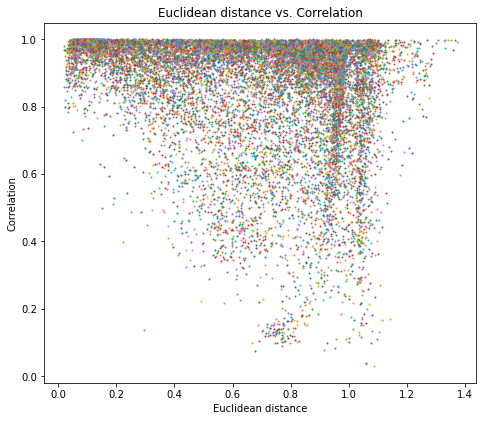

In [18]:
pageWidthInInches  = 6 
pageHeightInInches = 5  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
panel = plotUtils.createPanelSameSizeAsFig(fig)

y = cibersortFractionsDF.loc[:,'Correlation']
for i in range(len(eclidianDistanceNP)) :
    panel.plot(eclidianDistanceNP[i], y[i],
                    marker='o', # letter oh not zero
                    linewidth=0, # we want a point plot, not line plot
                    markeredgewidth=0, # the edge gets messed up always set to zero

                    markersize=2)
    
# independent (x) vs dependent (y)
title = "Euclidean distance vs. Correlation"
panel.set_title(title)
panel.set_xlabel('Euclidean distance')
panel.set_ylabel('Correlation')

#fig.show()    
imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile, bbox_inches='tight', dpi=300 )

In [19]:
# what is max possible distance in this space
# TODO check the math
# fraction must elements must sum to 1, prop area must equal 1
# v = np.ones(83) * 1.0/83.0
# print("TODO check geometry, max possible distance: {}".format(np.linalg.norm(v)))

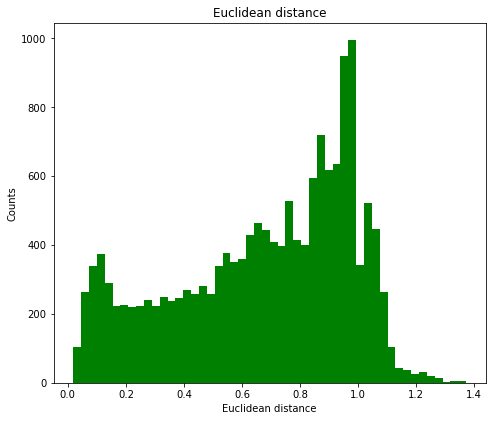

In [20]:
pageWidthInInches  = 6 
pageHeightInInches = 5  
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
panel = plotUtils.createPanelSameSizeAsFig(fig)

# density=True plot prob
n, bins, patches = plt.hist(eclidianDistanceNP, 50,  density=False, facecolor='g')#, alpha=0.75 density=True,


# independent (x) vs dependent (y)
panel.set_title("Euclidean distance")
panel.set_xlabel('Euclidean distance')
panel.set_ylabel('Counts')

fig.show()   

# how can we visualize 1 hot vs cibersort fraction?
for each cibersort fraction, identify how many wrong types where present, there type, and total noise contribution

# save

# Cosine similarity?

# our work
- https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html
- https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
- https://www.pythonpool.com/matplotlib-table/
- https://stackoverflow.com/questions/35003603/how-can-i-rotate-column-titles-in-pyplot-table
- https://matplotlib.org/stable/gallery/text_labels_and_annotations/demo_text_rotation_mode.html

In [21]:
pd.set_option('display.max_rows', 83)
metaDataDF.groupby('category').count()

,sample_id,participant_id,gender,age,dataSet,ACC,Adipose_Subcutaneous,Adipose_Visceral_Omentum,Adrenal_Gland,Artery_Aorta,...,THCA,THYM,Testis,Thyroid,UCEC,UCS,UVM,Uterus,Vagina,Whole_Blood
category,,,,,,,,,,,,,,,,,,,,,
ACC,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48
Adipose_Subcutaneous,398,398,398,398,398,398,398,398,398,398,...,398,398,398,398,398,398,398,398,398,398
Adipose_Visceral_Omentum,325,325,325,325,325,325,325,325,325,325,...,325,325,325,325,325,325,325,325,325,325
Adrenal_Gland,155,155,155,155,155,155,155,155,155,155,...,155,155,155,155,155,155,155,155,155,155
Artery_Aorta,259,259,259,259,259,259,259,259,259,259,...,259,259,259,259,259,259,259,259,259,259
Artery_Coronary,144,144,144,144,144,144,144,144,144,144,...,144,144,144,144,144,144,144,144,144,144
Artery_Tibial,397,397,397,397,397,397,397,397,397,397,...,397,397,397,397,397,397,397,397,397,397
BLCA,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
BRCA,638,638,638,638,638,638,638,638,638,638,...,638,638,638,638,638,638,638,638,638,638


# SAVE refactor table plot

In [22]:
def selectTableDataSave(cibersortFractionsDF, typeCols, metaDataDF, metaDataCols, sampleType="ACC"):
    #metaCols = ['sample_id', 'category', 'gender', 'age', 'dataSet']
    samples = metaDataDF.loc[:, 'category'] == sampleType
    samplesMetaDF = metaDataDF.loc[ samples, metaDataCols ]

    fractionsDF = cibersortFractionsDF.loc[:, ['Mixture'] + typeCols ]

    fractionsMetaDF = fractionsDF.merge(right=samplesMetaDF, how='inner', left_on='Mixture', right_on='sample_id' )
    #display(accFractionsMetaDF.head())
    
    expectedFractionsIdx = [] # np fancy indexing,

    # TODO get expectedFractionsIdxs from training meta/label
    expectedFractionsIdx.append(typeCols.index(sampleType)) 

    retDF = fractionsMetaDF.loc[:,typeCols]
    retMetaDF = fractionsMetaDF.loc[:,metaDataCols]
    
    return(retDF, retMetaDF, expectedFractionsIdx)

In [23]:
def createTablePlotDataSave(df, expectedFractionsIdx):
    cellText = []
    cellColors = []

    for index, row in df.iterrows():
        valuesNP = row.to_numpy().round(decimals=2)
        #aedwip this was a test valuesNP[expectedFractionsIdx] = 999    
        tableRow =  [ str(v)  for v in valuesNP ]
        cellText.append(tableRow)
        rowColor = []
        for j in range(len(valuesNP)):
            fraction = valuesNP[j]
            if fraction == 0 :
                tableRow[j] = "" # do not display zero, makes table busy
                rowColor.append( (255/255, 255/255, 255/255) )
            else:
                rowColor.append( (255/255, 255/255, 230/255) )

        # use color to identify expected fraction components
        for j in range(len(expectedFractionsIdx)):
            col = expectedFractionsIdx[j]
            rowColor[col] = (0/255, 230/255, 0/255)

        cellColors.append(rowColor)

    return( cellText, cellColors )
    

In [24]:
def plotTableSave(pageWidthInInches, pageHeightInInches, cellText, cellColors, title):
    '''
    ref: 
       - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html
       - https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
    '''
    fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
    panel = plotUtils.createPanelSameSizeAsFig(fig)

    tablePanel = panel.table(
                        cellText=cellText
                        # ,rowLabels=rowLabels
                        # ,colLabels=colLabels
                        #,loc='center' # center table in panel, title is in center
                        #,loc='bottom' # center table in panel does not work well
                        ,loc='best'
                        #,rowColours=aedwip,
                        #,colColourslist=aedwip
                        ,cellColours= cellColors
                       )

    # get rid of bar chart axis and box 
    panel.get_xaxis().set_visible(False)
    panel.get_yaxis().set_visible(False)

    tablePanel.scale(1, 1.5)

    plt.box(on=None)
    panel.set_title(title)

    return (fig, tablePanel, panel)

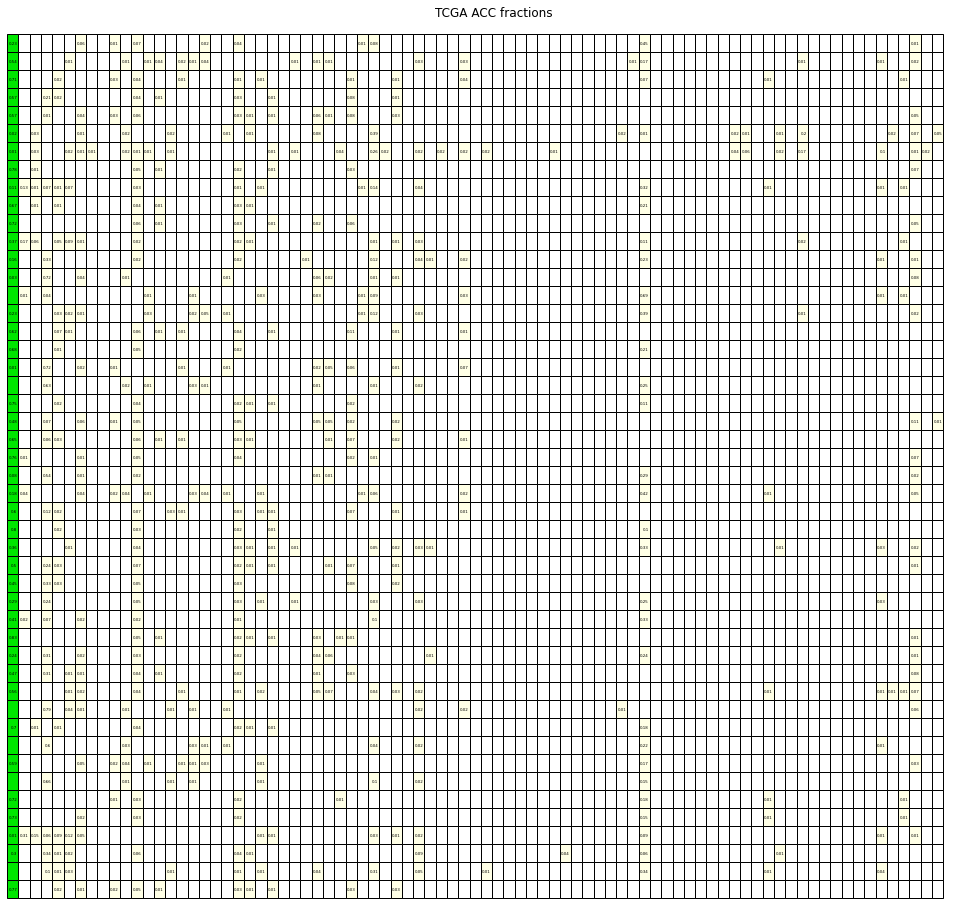

In [25]:

metaCols = ['sample_id', 'category', 'gender', 'age', 'dataSet']
sampleDF, sampleMetaDF, expectedFractionsIdx = selectTableDataSave(cibersortFractionsDF, typeCols, metaDataDF, metaCols, sampleType="ACC")

cellText, cellColors = createTablePlotDataSave( sampleDF, expectedFractionsIdx )

pageWidthInInches  = 13 
pageHeightInInches = 8 
title = 'TCGA ACC fractions'

fig, table, panel = plotTableSave( pageWidthInInches, pageHeightInInches, cellText, cellColors, title )

imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile, bbox_inches='tight', dpi=300 )

# <span style="color:red">refactor into functions</span>

In [26]:
def calculateExpectedFractionsIdx(sampleDF, expectedFractionTypes):
    '''
    arguments:
        sampleDF: 
            a data frame, column names include fraction types
        
        expectedFractionTypes:
            a list of column names we want idx for. typically these represent
            the expected fractions types extracted from meta data
        
     returns: expectedFractionsIdx list
         the metaDataDF contains expected fractions
         expectedFractionsIdx is a list of column idx representing the expected fractions, all other 
         fraction columns should be close to zero if the types are perfectly disjoint. Cancer has a mix of
         healthy and cancer. Healthy may have some cancer signature
    '''
    
    expectedFractionsIdx = [] # np fancy indexing,
    
    expectedFractionsIdx = [] # np fancy indexing,
    for fractionType in expectedFractionTypes:
        cols = sampleDF.columns.to_list()
        try :
            idx = cols.index(fractionType)
            expectedFractionsIdx.append(idx)
        except ValueError:
            print("ERROR: fraction type {} not found, was it is col sum < threshold".format(fractionType))
            
    return expectedFractionsIdx
    

In [27]:
def selectTableData(fractionsDF, fractionCols, metaDataDF, metaDataCols, sampleType="ACC"):
    ''' 
    joins fractions with meta
    
    arguments:
        fractionCols, list of fractionsDF columns you want to create table for
    
    returns: ( ciberSortFractionsDF == sampleType, fractionsMetaDF == sampleType)
        #expectedFractionsIdx 
        #    the metaDataDF contains expected fractions
        #    expectedFractionsIdx is a list of column idx representing the expected fractions, all other 
        #    fraction columns should be close to zero if the types are perfectly disjoint. Cancer has a mix of
        #    healthy and cancer. Healthy may have some cancer signature
    '''
    
    samples = metaDataDF.loc[:, 'category'] == sampleType
    samplesMetaDF = metaDataDF.loc[ samples, metaDataCols ]

    fractionsTmpDF = fractionsDF.loc[:, ['Mixture'] + fractionCols ]

    fractionsMetaDF = fractionsTmpDF.merge(right=samplesMetaDF, how='inner', left_on='Mixture', right_on='sample_id' )
   
    retDF = fractionsMetaDF.loc[:,fractionCols].sort_values(by='Correlation', ascending=False)
    
    retMetaDF = fractionsMetaDF.loc[:,metaDataCols]
    
    return(retDF, retMetaDF)

In [28]:
def createTablePlotData(df, expectedFractionsIdx):
    cellText = []
    cellColors = []

    for index, row in df.iterrows():
        valuesNP = row.to_numpy().round(decimals=2)
        #aedwip this was a test valuesNP[expectedFractionsIdx] = 999    
        tableRow =  [ str(v)  for v in valuesNP ]
        cellText.append(tableRow)
        rowColor = []
        for j in range(len(valuesNP)):
            fraction = valuesNP[j]
            if fraction == 0 :
                tableRow[j] = "" # do not display zero, makes table busy
                rowColor.append( (255/255, 255/255, 255/255) )
            else:
                rowColor.append( (255/255, 255/255, 230/255) )

        # use color to identify expected fraction components
        for j in range(len(expectedFractionsIdx)):
            col = expectedFractionsIdx[j]
            rowColor[col] = (0/255, 230/255, 0/255)

        cellColors.append(rowColor)

    return( cellText, cellColors )

In [29]:
def plotTable(pageWidthInInches, pageHeightInInches, cellText, cellColors, title):
    '''
    ref: 
       - https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.table.html
       - https://towardsdatascience.com/simple-little-tables-with-matplotlib-9780ef5d0bc4
    '''
    fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
    panel = plotUtils.createPanelSameSizeAsFig(fig)

    tablePanel = panel.table(
                        cellText=cellText
                        # ,rowLabels=rowLabels
                        # ,colLabels=colLabels
                        #,loc='center' # center table in panel, title is in center
                        #,loc='bottom' # center table in panel does not work well
                        ,loc='best'
                        #,rowColours=aedwip,
                        #,colColourslist=aedwip
                        ,cellColours= cellColors
                        ,fontsize=6
                       )

    # get rid of bar chart axis and box 
    panel.get_xaxis().set_visible(False)
    panel.get_yaxis().set_visible(False)

    tablePanel.scale(1, 1.5)

    plt.box(on=None)
    panel.set_title(title)

    return (fig, tablePanel, panel)

## <span style="color:red">Test refactor</span>

In [30]:
# select data
metaCols = ['sample_id', 'category', 'gender', 'age', 'dataSet']
sampleType="Kidney_Cortex"
extraCols = ['Correlation', 'P-value']
fractionCols =  extraCols + typeCols
sampleDF, sampleMetaDF = selectTableData(cibersortFractionsDF, fractionCols, metaDataDF, 
                                                               metaCols, sampleType=sampleType)


# remove empty columns  
colSumsSeries = sampleDF.sum()
qtr1 = colSumsSeries.quantile([0.25]).values[0]
print("drop columns where col sum is <= 1st quantile ie. {:.5f}".format(qtr1))

colsToDropSeries =  colSumsSeries.le(qtr1)
colNameToDropList = colSumsSeries[colsToDropSeries].index.to_list()
print(colNameToDropList)

sampleDF = sampleDF.drop(columns=colNameToDropList)
# threshold = 
# sampleDF, expectedFractionsIdx = dropColSums(threshold, expectedFractionTypes=[sampleType])

# create the plot data
expectedFractionsIdx = calculateExpectedFractionsIdx(sampleDF, expectedFractionTypes=[sampleType])
print("\nexpectedFractionsIdx:{}".format(expectedFractionsIdx))

cellText, cellColors = createTablePlotData( sampleDF, expectedFractionsIdx )

pageWidthInInches  = 13 
pageHeightInInches = 8 
title = 'GTEx Kidney_Cortex fractions aedwip filtered'

drop columns where col sum is <= 1st quantile ie. 0.01734
['BRCA', 'Brain_Hypothalamus', 'Brain_Substantia_nigra', 'Colon_Transverse', 'ESCA', 'Heart_Atrial_Appendage', 'LGG', 'LIHC', 'LUAD', 'MESO', 'Minor_Salivary_Gland', 'PAAD', 'PCPG', 'PRAD', 'Pituitary', 'SARC', 'Stomach', 'TGCT', 'THCA', 'THYM', 'Testis', 'Vagina']

expectedFractionsIdx:[40]


In [31]:
# create headerColor list
ltblue = (52/255, 210/255, 235/255)
blueer = (52/255, 119/255, 235/255)
lightgreen = (52/255, 235/255, 225/255)

dataSetDF = metaDataDF.loc[:, ['category', 'dataSet']]

# TODO AEDWIP rename master
dataSetDict = {}
for keyValueList in dataSetDF.values:
    category = keyValueList[0]
    dataSet = keyValueList[1]
    dataSetDict[category] = dataSet

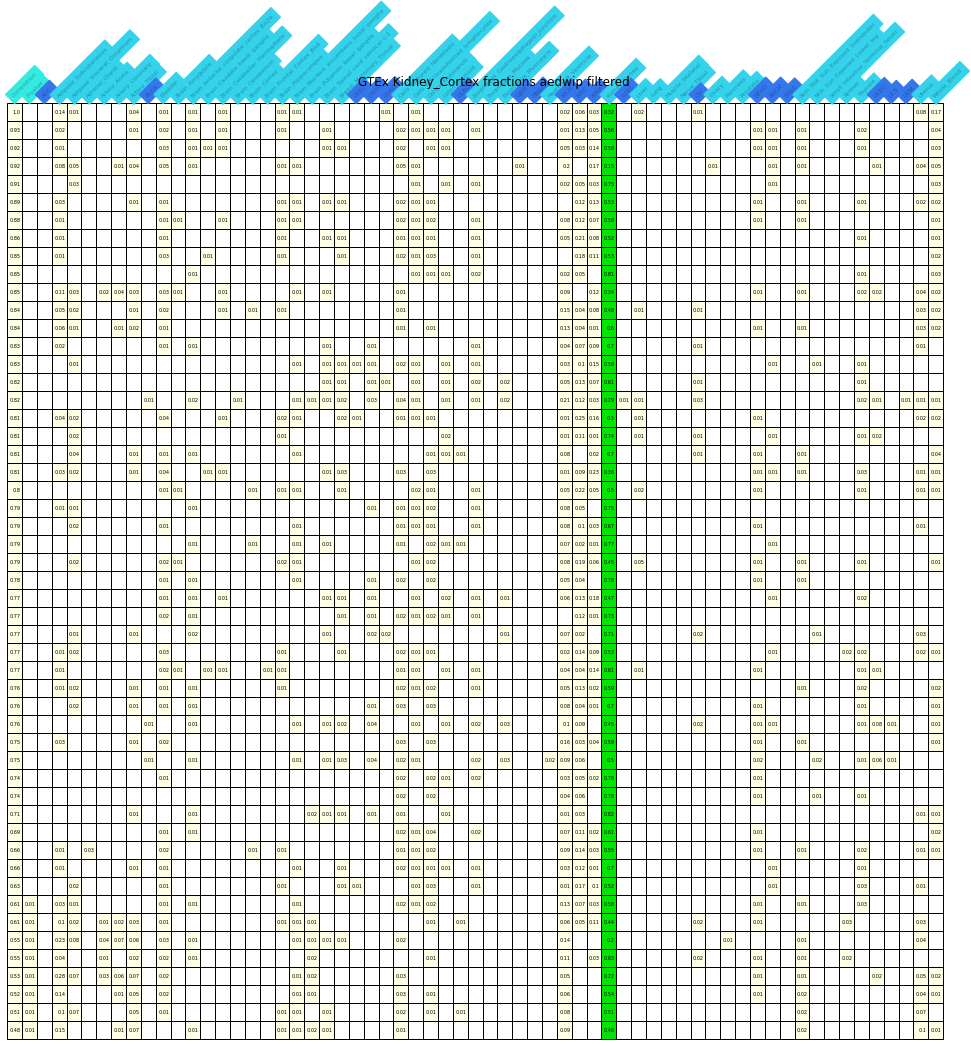

In [32]:
# create the table plot and add headings
fig, table, panel = plotTable( pageWidthInInches, pageHeightInInches, cellText, cellColors, title )

tcell = table._cells[(0, 0)]
cellWidth = tcell.get_width()
startX  = tcell.get_x() - cellWidth
y = 0.99 #0.98 #0.975 #0.96 #1

headings = sampleDF.columns
for i in range(len(headings)): 
    heading = headings[i]
    x = startX + i * cellWidth
    
    blueer = (52/255, 119/255, 235/255)
    ltblue = (52/255, 210/255, 235/255)
    lightgreen = (52/255, 235/255, 225/255)
    color = lightgreen
    
    if heading not in dataSetDict:
        color = lightgreen        
    elif dataSetDict[heading] == 'GTEx':
        color = ltblue
    elif dataSetDict[heading] == 'TCGA' :
        color = blueer
    
        
    panel.text(x, y, heading, 
               horizontalalignment="left", verticalalignment="baseline", 
               rotation=45 
               ,fontsize=6 #fontsize=4
               ,backgroundcolor=color
               ,alpha=0.3
              ) 

imgFile = imgOutDir.joinpath( urlify(title) + ".png" )
plt.savefig( imgFile , bbox_inches='tight', dpi=300)

Text(0.5, 0.1, 'what color is this')

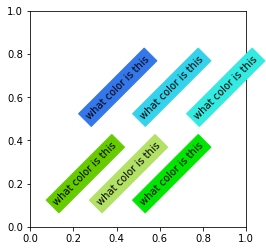

In [33]:
# color test

pageWidthInInches  = 3 
pageHeightInInches = 3 
fig = plt.figure( figsize=(pageWidthInInches, pageHeightInInches) )
panel = plotUtils.createPanelSameSizeAsFig(fig)

blueer = (52/255, 119/255, 235/255)
ltblue = (52/255, 210/255, 235/255)
lightgreen = (52/255, 235/255, 225/255)

panel.text( 0.75, 0.5, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=lightgreen)

panel.text( 0.5, 0.5, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=ltblue)




panel.text( 0.25, 0.5, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=blueer )

panel.text( 0.1, 0.1, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=(102/255, 204/255, 0/255) )

panel.text( 0.3, 0.1, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=(178/255, 225/255, 102/255) )

panel.text( 0.5, 0.1, "what color is this",
           horizontalalignment='left', 
           verticalalignment='baseline', 
           rotation=45
          , backgroundcolor=(0/255, 230/255, 0/255) )